## Carga de librerías necesarias

In [634]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Parte 1

## 1. Coordenadas cromáticas

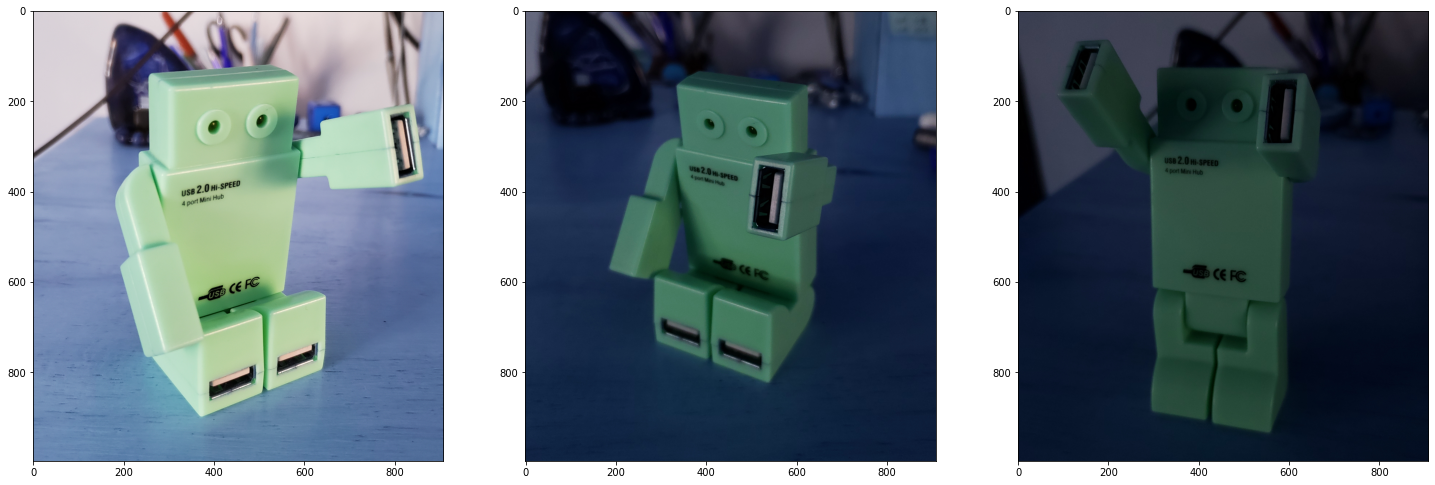

In [635]:
# Cargo las imágenes

img1 = cv.imread(f'coord_cromaticas\CoordCrom_1.png')
img2 = cv.imread(f'coord_cromaticas\CoordCrom_2.png')
img3 = cv.imread(f'coord_cromaticas\CoordCrom_3.png')

fig = plt.figure(figsize=(25,25))
ax1=plt.subplot(231)
ax1.imshow(img1)
ax2=plt.subplot(232)
ax2.imshow(img2)
ax3=plt.subplot(233)
ax3.imshow(img3)

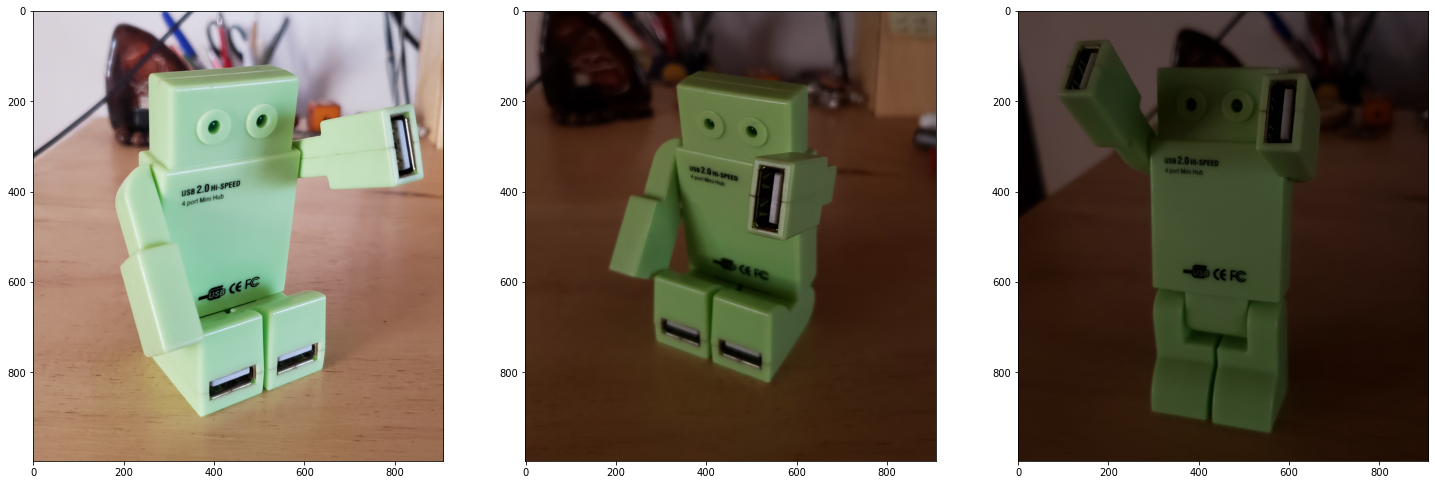

In [636]:
# Transformo a RGB
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

# Grafico las imágenes ya convertidas
fig = plt.figure(figsize=(25,25))
ax1=plt.subplot(231)
ax1.imshow(img1)
ax2=plt.subplot(232)
ax2.imshow(img2)
ax3=plt.subplot(233)
ax3.imshow(img3)

In [637]:
def coordenadasCromaticas(imagenrgb : np.ndarray ):

    # Hallo la suma de las componentes RGB para cada píxel
    sumargb = imagenrgb.sum(axis=2)[:,:,np.newaxis]

    # Reemplazo por 1 los valores = 0 para evitar indeterminaciones al dividir 0/0
    sumargb[sumargb==0]=1 

    # Escalo a 255 y casteo a uint8 para poder tratar como imágenes
    img_cc = ((imagenrgb/sumargb)*255).astype('uint8')

    return img_cc

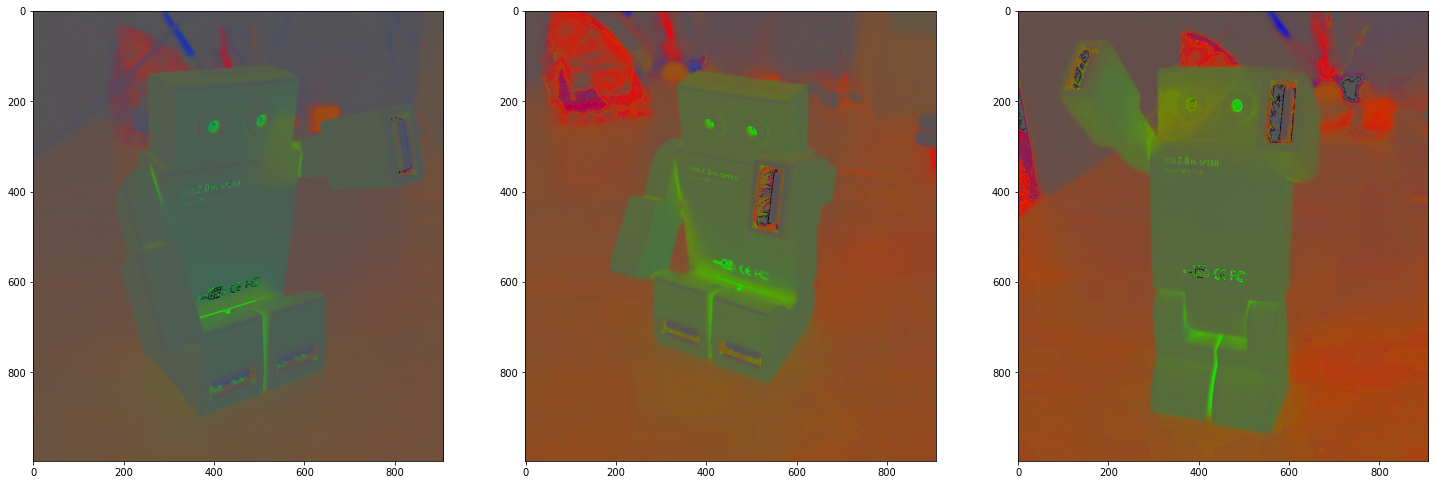

In [638]:
img1_cc = coordenadasCromaticas(img1)
img2_cc = coordenadasCromaticas(img2)
img3_cc = coordenadasCromaticas(img3)


# Grafico con el algoritmo de coordenadas cromáticas aplicado
fig = plt.figure(figsize=(25,25))
ax1 = plt.subplot(231)
ax1.imshow(img1_cc)
ax2 = plt.subplot(232)
ax2.imshow(img2_cc)
ax3 = plt.subplot(233)
ax3.imshow(img3_cc)

Análisis: Se produce una (muy) ligera alteración de la imagen al reemplazar por 1 los valores en los que la suma de las componentes RGB era nula. Se podría implementar una función distinta (usando el método where de numpy por ejemplo) para reemplazar el resultado de la división 0/0 por 0, pero implicaría un desarrollo un poco más complejo. Por simplicidad se optó por usar la función implementada.

## 2. White Patch

In [639]:
# Cargo las imágenes
nombresImagenes = os.listdir(f'white_patch/')
imagenes = [cv.imread(f'white_patch/'+ i) for i in nombresImagenes]

for i, imagen in enumerate(imagenes):
    imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
    imagenes[i] = imagen



In [640]:
def toWhitePatch(imagenrgb : np.ndarray, factor : float = 1.0):
    canalr,canalg,canalb = cv.split(imagenrgb)

    r_max=canalr.max()
    g_max=canalg.max()
    b_max=canalb.max()

    print("Máximos de los canales antes del parche",r_max, g_max, b_max)

    r_max=r_max*factor
    g_max=g_max*factor
    b_max=b_max*factor

    img_wp_r=(255/r_max)*canalr
    img_wp_g=(255/g_max)*canalg
    img_wp_b=(255/b_max)*canalb

    np.clip(img_wp_r, 0, 255, out=img_wp_r)   
    np.clip(img_wp_g, 0, 255, out=img_wp_g)   
    np.clip(img_wp_b, 0, 255, out=img_wp_b)   

    img_wp_r=img_wp_r.astype('uint8')         
    img_wp_g=img_wp_g.astype('uint8')         
    img_wp_b=img_wp_b.astype('uint8')         

    img_wp = cv.merge((img_wp_r, img_wp_g, img_wp_b))

    return img_wp

Máximos de los canales antes del parche 165 138 200
Máximos de los canales antes del parche 210 250 171
Máximos de los canales antes del parche 247 157 175


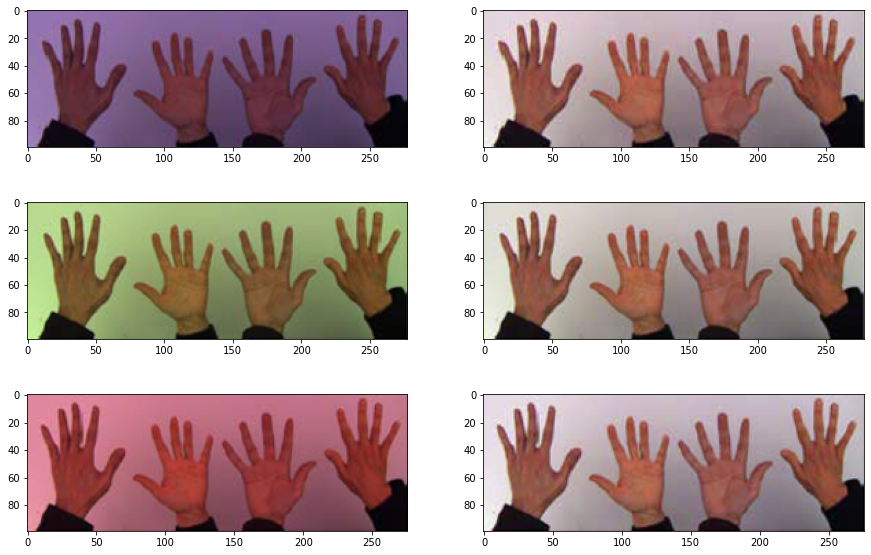

In [641]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(321)
ax1.imshow(imagenes[0])
ax2 = plt.subplot(322)
ax2.imshow(toWhitePatch(imagenes[0]))
ax3 = plt.subplot(323)
ax3.imshow(imagenes[1])
ax4 = plt.subplot(324)
ax4.imshow(toWhitePatch(imagenes[1]))
ax5 = plt.subplot(325)
ax5.imshow(imagenes[2])
ax6 = plt.subplot(326)
ax6.imshow(toWhitePatch(imagenes[2]))


Máximos de los canales antes del parche 255 255 255
Máximos de los canales antes del parche 126 252 155
Máximos de los canales antes del parche 170 255 172
Máximos de los canales antes del parche 255 134 122
Máximos de los canales antes del parche 255 201 203


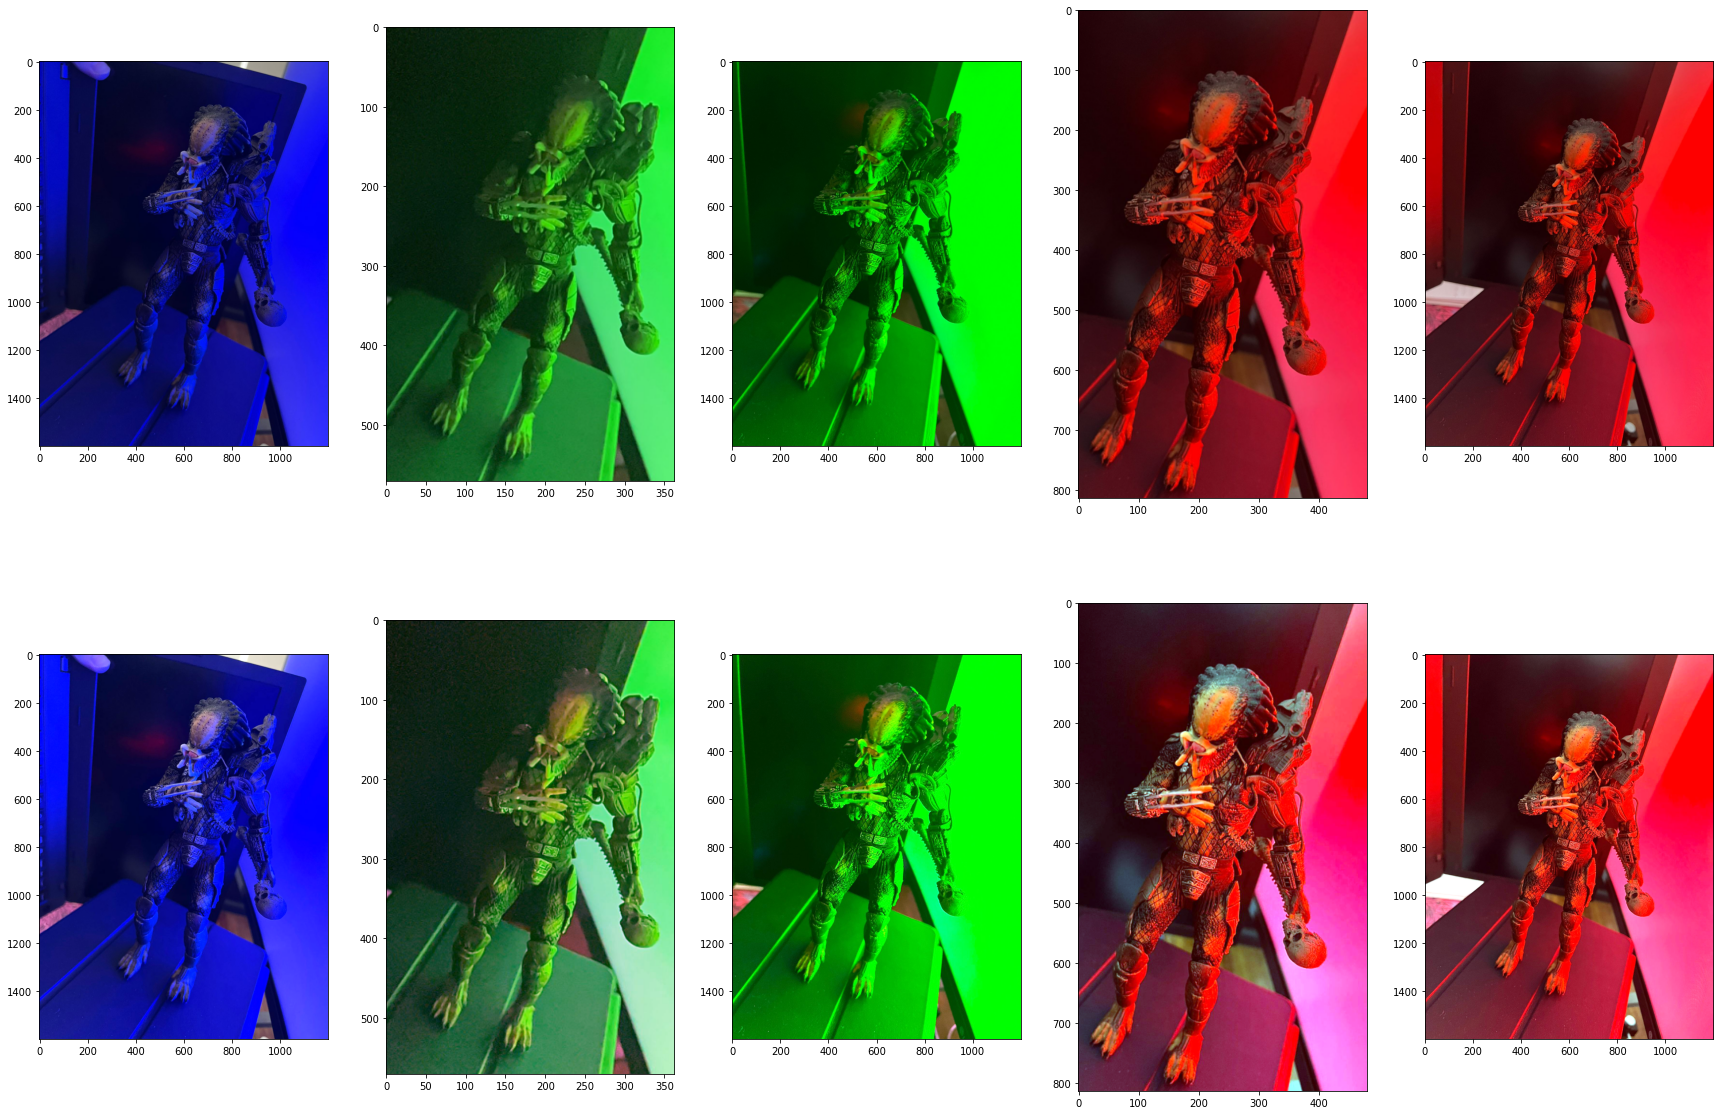

In [643]:
fig = plt.figure(figsize=(30,20))
ax1 = plt.subplot(251)
ax1.imshow(imagenes[3])
ax2 = plt.subplot(256)
ax2.imshow(toWhitePatch(imagenes[3],factor=0.7))
ax3 = plt.subplot(252)
ax3.imshow(imagenes[4])
ax4 = plt.subplot(257)
ax4.imshow(toWhitePatch(imagenes[4]))
ax5 = plt.subplot(253)
ax5.imshow(imagenes[5])
ax6 = plt.subplot(258)
ax6.imshow(toWhitePatch(imagenes[5],factor=0.75))
ax7 = plt.subplot(254)
ax7.imshow(imagenes[6])
ax8 = plt.subplot(259)
ax8.imshow(toWhitePatch(imagenes[6], factor=0.8))
ax7 = plt.subplot(255)
ax7.imshow(imagenes[7])
ax8 = plt.subplot(2,5,10)
ax8.imshow(toWhitePatch(imagenes[7], factor=0.7))


Análisis: Se aplicó un factor de multiplicación o percentil al máximo en la función para los casos en que tuviésemos máximos de los 3 canales = 255, debido a que para estos casos se multiplica el valor del color por 1, haciendo que el parche no cumpla con su función (lo mismo que no aplicarlo).

Máximos de los canales antes del parche 255 255 255
Máximos de los canales antes del parche 255 255 255


Text(0.5, 1.0, 'Factor 0.8')

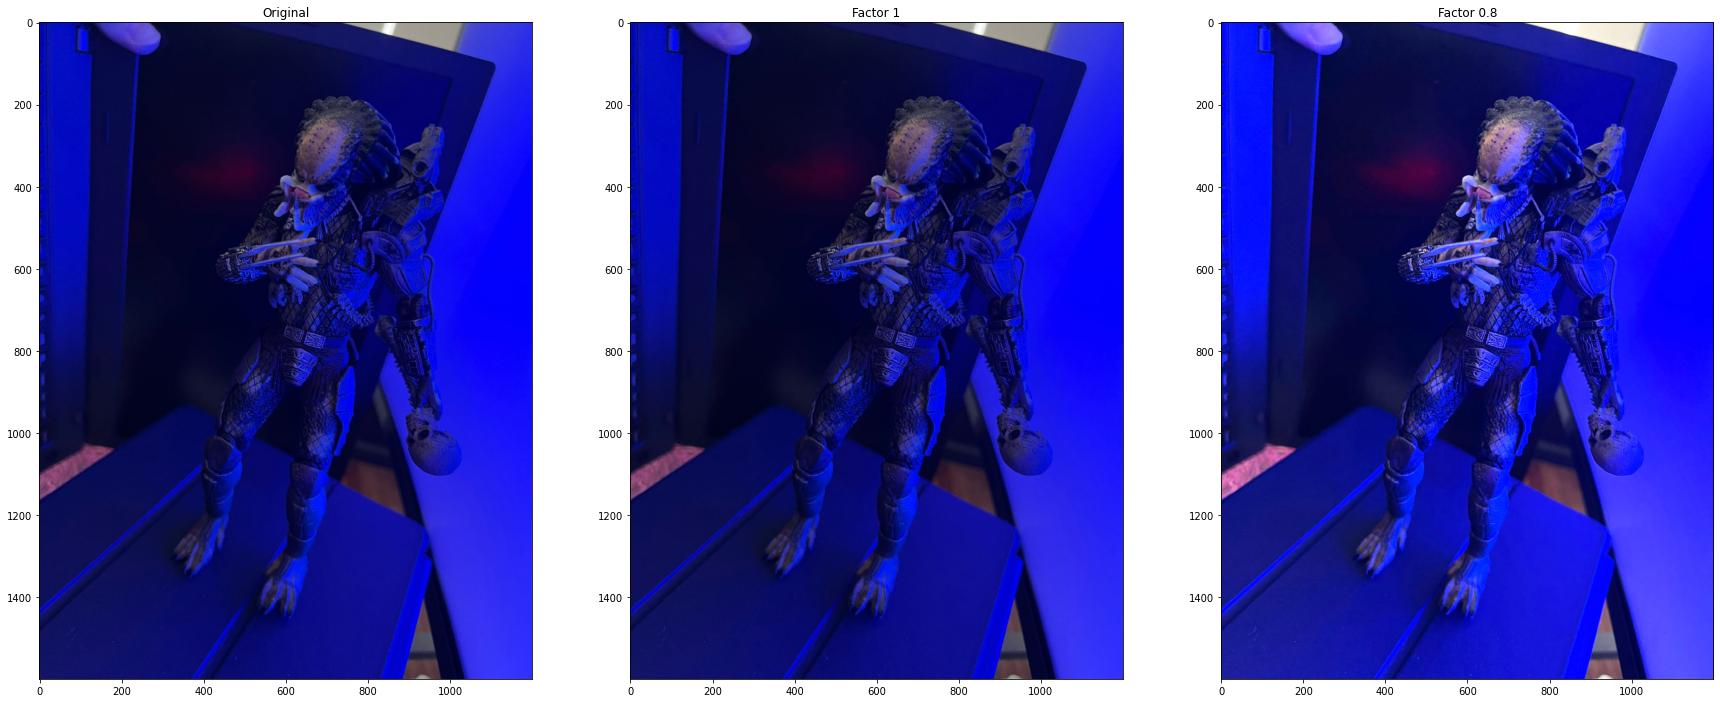

In [644]:
fig = plt.figure(figsize=(30,20))
ax1 = plt.subplot(131)
ax1.imshow(imagenes[3])
ax1.set_title('Original')
ax2 = plt.subplot(132)
ax2.imshow(toWhitePatch(imagenes[3], factor=1))
ax2.set_title('Factor 1')
ax3 = plt.subplot(133)
ax3.imshow(toWhitePatch(imagenes[3], factor=0.65))
ax3.set_title('Factor 0.8')

# Parte 2

## 1.

In [645]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

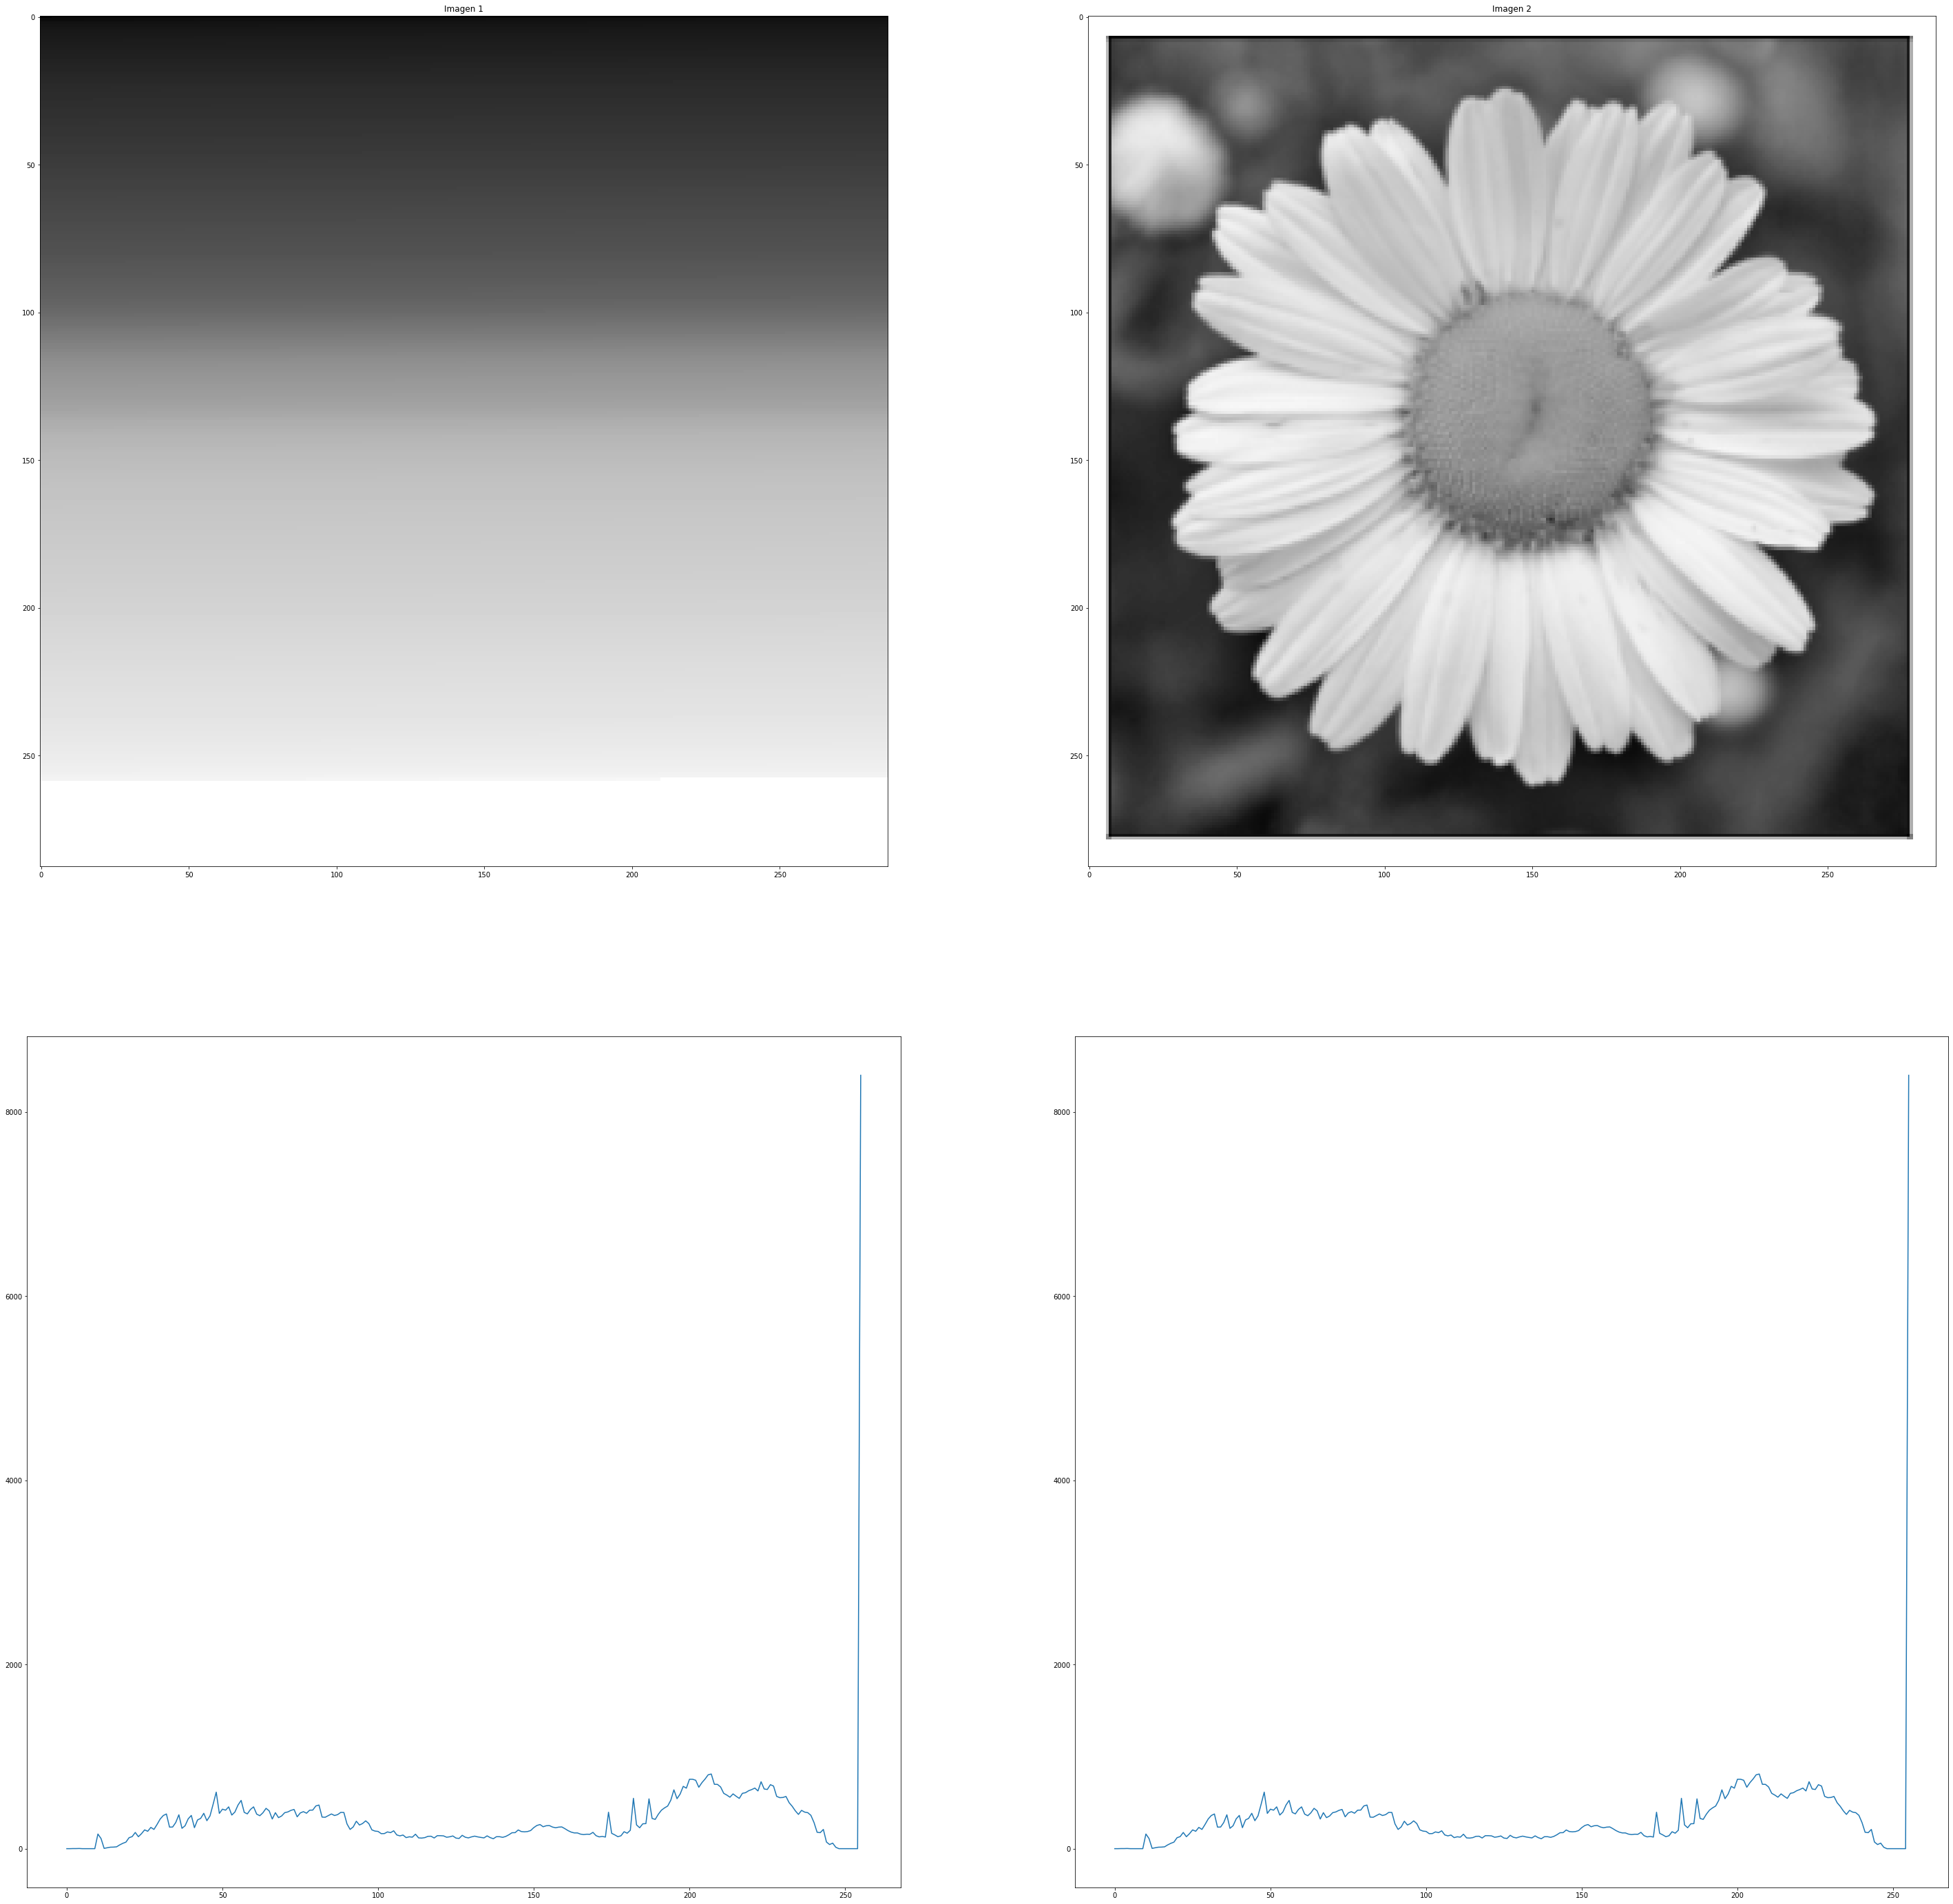

In [646]:
fig = plt.figure(figsize=(50,50))


ax1=plt.subplot(221)
ax1.imshow(img1, cmap='gray')
ax1.set_title('Imagen 1')

hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)


ax2=plt.subplot(222)
ax2.imshow(img2, cmap='gray')
ax2.set_title('Imagen 2')

hist2,bins2 = np.histogram(img2.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

Ambas imágenes comparten el mismo histograma, y por su "suavidad" podría decirse que no tienen un procesamiento aplicado.

P: Si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

R: Sí. En 2 dimensiones creo que serían más útiles dado a que en una sola dimensión como en este caso diferentes imágenes comparten el mismo histograma, pero en 2d es muy difícil que ocurra, siendo así el histograma una característica específica de una imagen.

## 3

Text(0.5, 1.0, 'Canal B')

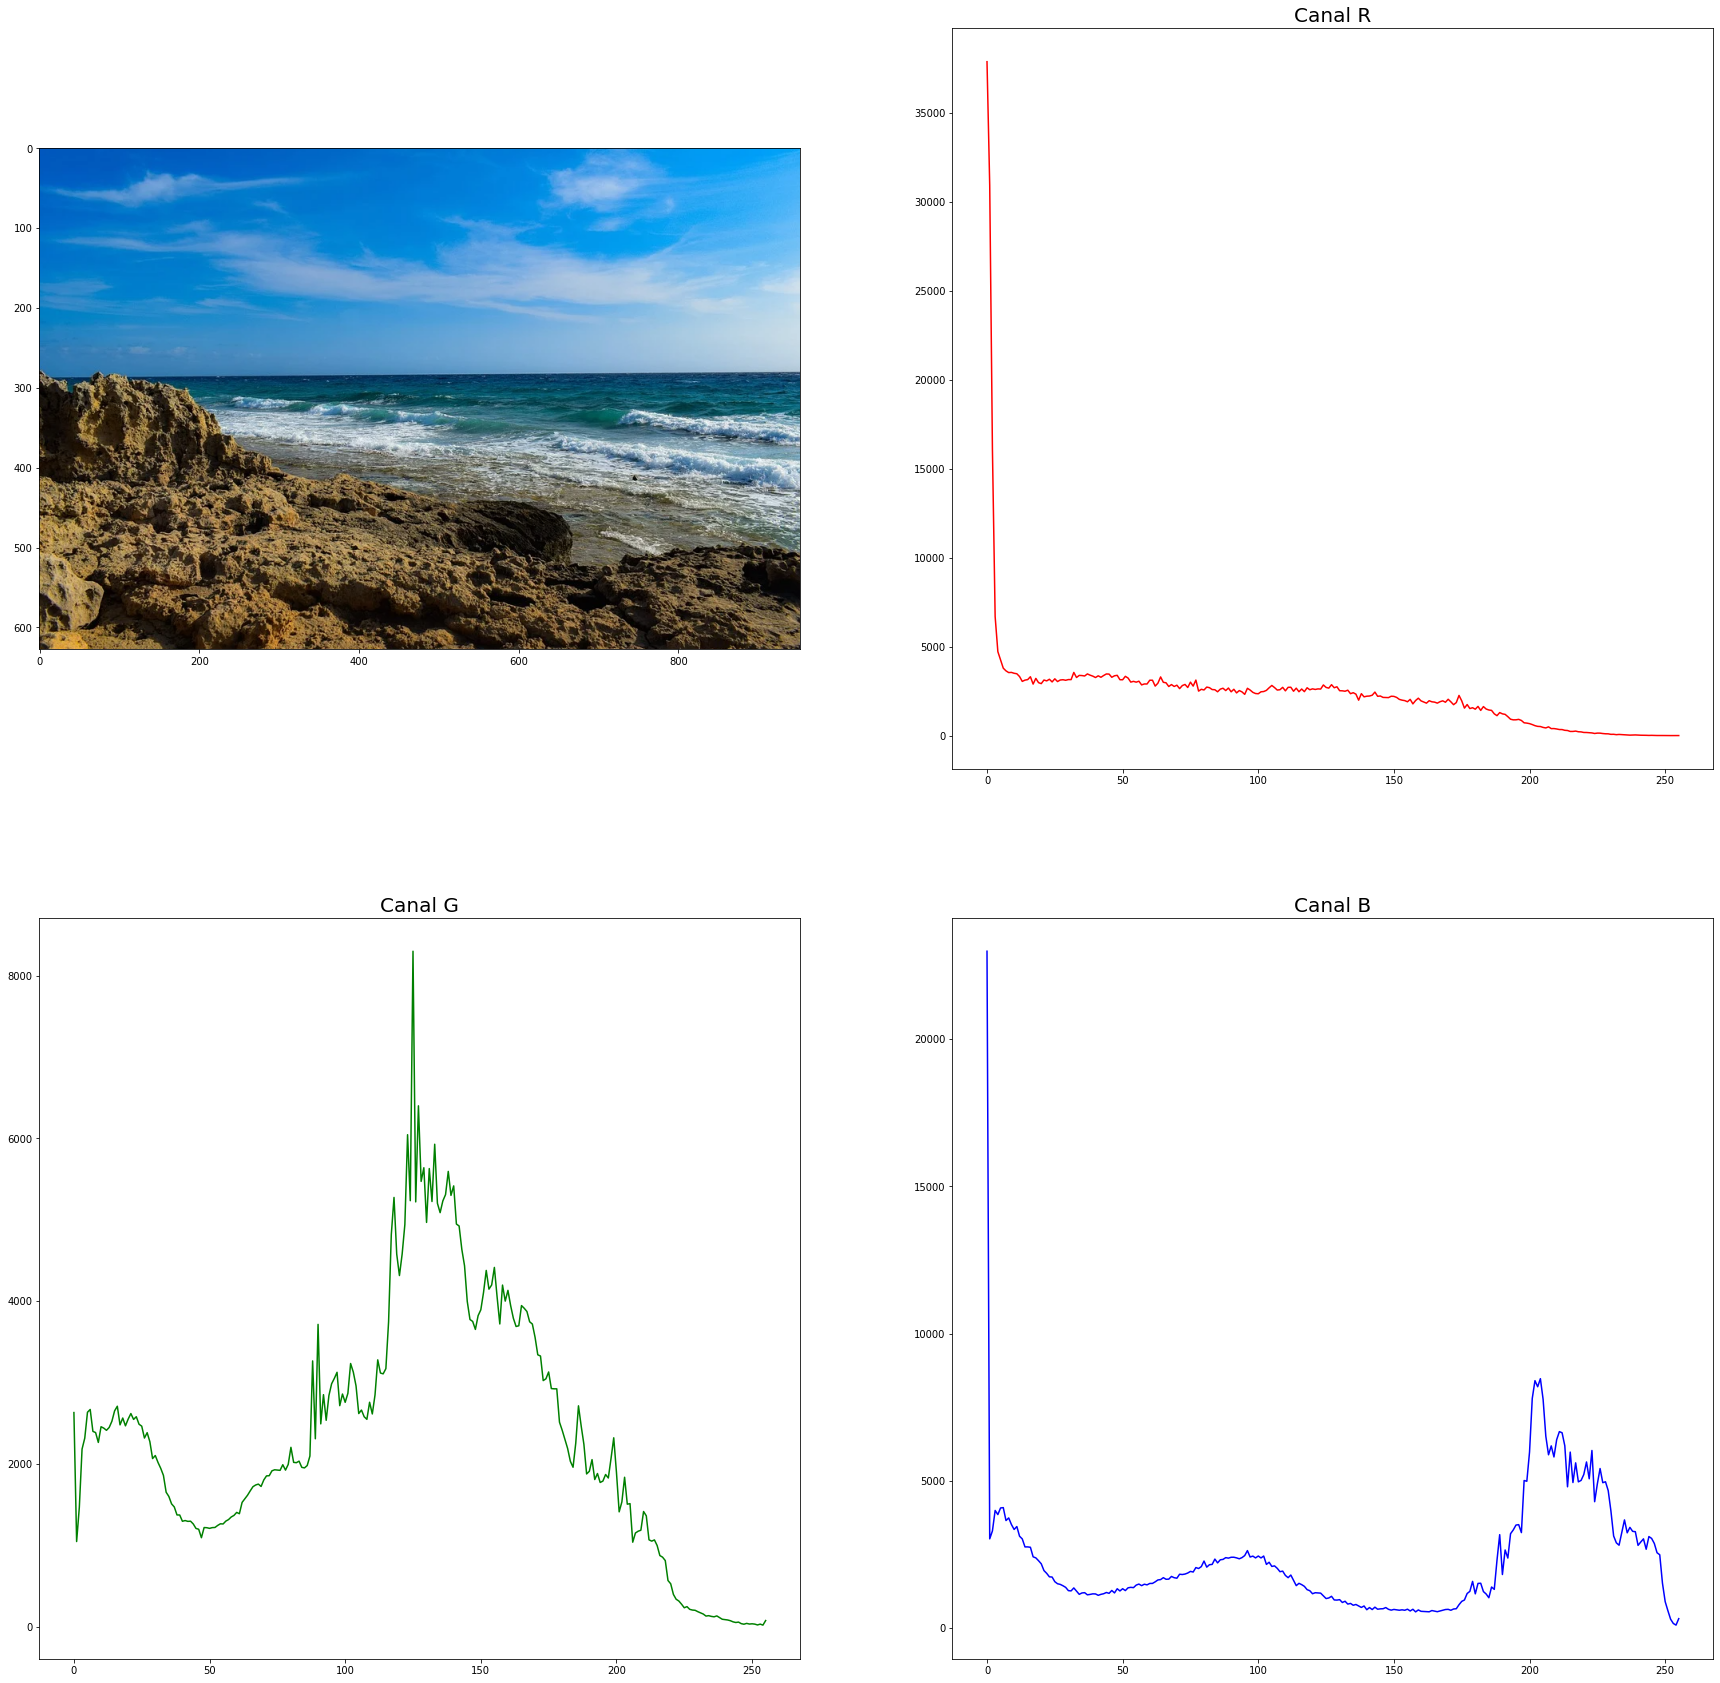

In [647]:
img3 = cv.imread('segmentacion.png')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
canalr,canalg,canalb = cv.split(img3)

fig = plt.figure(figsize=(30,30))

ax1=plt.subplot(221)
ax1.imshow(img3)
ax1.set_title('')

histr,binsr = np.histogram(canalr.ravel(),256,[0,256])
ax2=plt.subplot(222)
ax2.plot(histr, color="red")
ax2.set_title('Canal R', fontdict= {'fontsize': 20})

histg,binsg = np.histogram(canalg.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(histg, color="green")
ax3.set_title('Canal G', fontdict= {'fontsize': 20})

histb,binsb = np.histogram(canalb.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(histb, color="blue")
ax4.set_title('Canal B', fontdict= {'fontsize': 20})


### Cielo

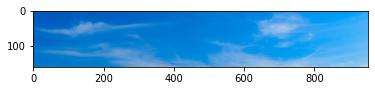

In [648]:
muestra_cielo = img3[:160,:,:]
plt.figure(1)
plt.imshow(muestra_cielo)
plt.show()

[34.15293809024134, 141.06922875131164, 219.0565779118573]
[42.95558660452287, 26.662251664728096, 17.33342452036107]


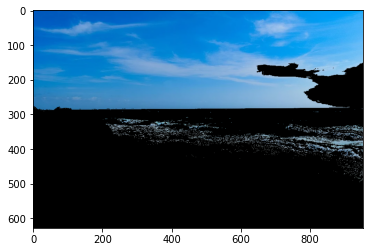

<function matplotlib.pyplot.show(close=None, block=None)>

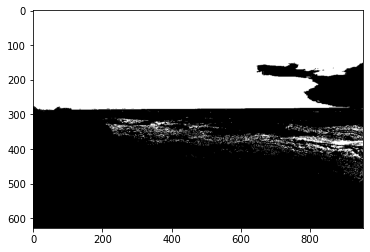

In [649]:
color_mean, color_std = cv.meanStdDev(muestra_cielo)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

n_sigma = 3
mask = cv.inRange(img3, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img3, img3, mask=mask)

plt.figure(121)
plt.imshow(img_segmentada)
plt.show()

plt.figure(122)
plt.imshow(mask,cmap='gray')
plt.show

Toma parte del mar, esto no es correcto. Se prueba entonces segmentando en el espacio HSV.

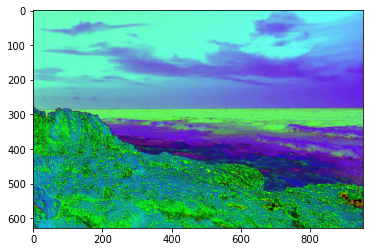

In [650]:
img_HSV = cv.cvtColor(img3, cv.COLOR_RGB2HSV)
plt.figure(1)
plt.imshow(img_HSV)

[102.9302151101784, 201.44931794333684, 218.5763168940189]
[1.549062592989214, 61.03650510095398, 16.412656016486867]


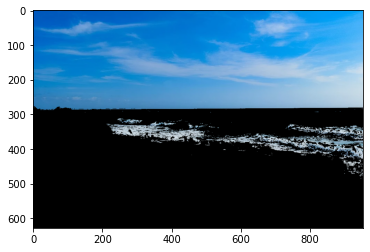

<function matplotlib.pyplot.show(close=None, block=None)>

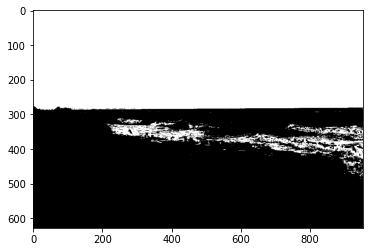

In [651]:
muestra_cielo_hsv = img_HSV[:200,:,:]

color_mean, color_std = cv.meanStdDev(muestra_cielo_hsv)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

n_sigma = 3
mask = cv.inRange(img_HSV, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img3, img3, mask=mask)

plt.figure(121)
plt.imshow(img_segmentada)
plt.show()

plt.figure(122)
plt.imshow(mask,cmap='gray')
plt.show

Mejora un poco haciendo la segmentación en HSV, aunque sigue costando no incluir parte blanca de las olas del mar

### Mar

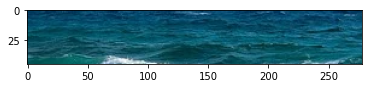

In [652]:
muestra_mar = img3[290:335,675:,:]
plt.figure(1)
plt.imshow(muestra_mar)
plt.show()

[16.335011990407676, 86.16658673061552, 107.46139088729018]
[25.544708482867374, 23.456412002883805, 22.92313442944108]
[96.91087130295764, 222.442206235012, 107.48417266187052]
[2.8376201383875306, 36.4847632149524, 22.9184045404914]


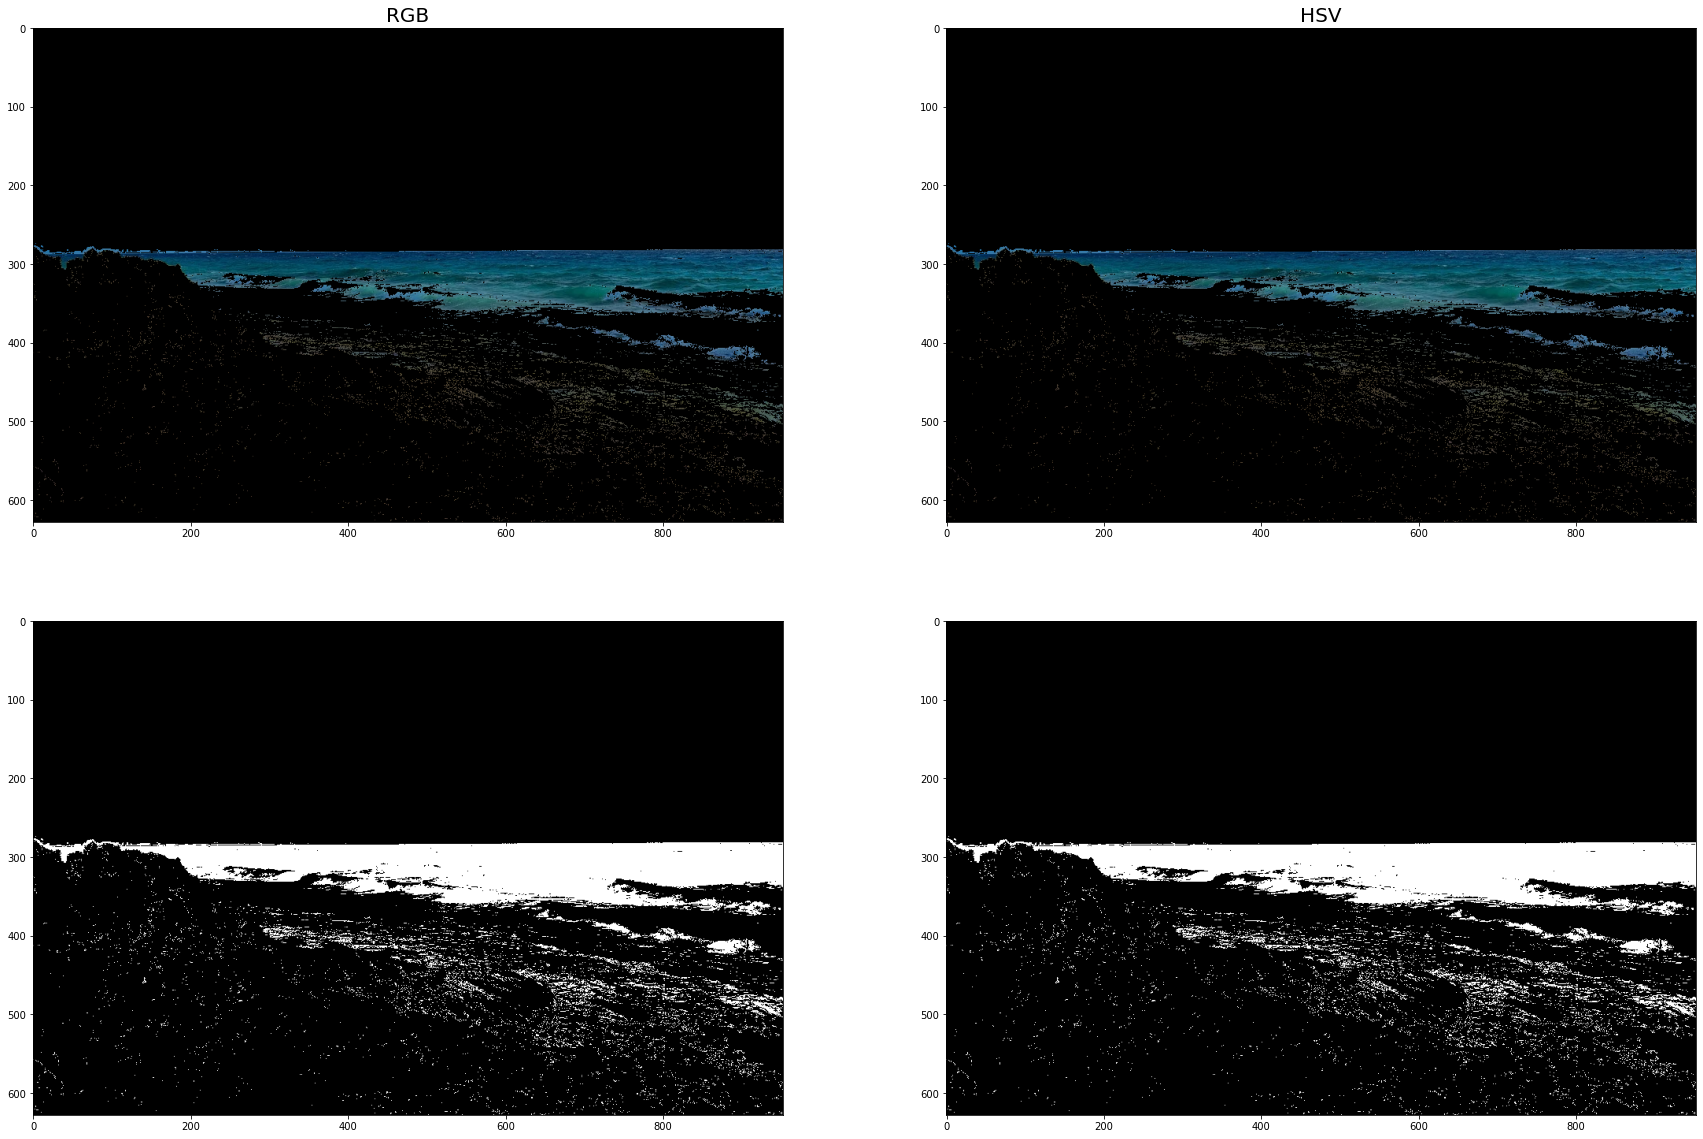

In [653]:
#Obtengo las medias y desviaciones estándar en RGB y HSV
color_mean, color_std = cv.meanStdDev(muestra_mar)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

color_mean_HSV, color_std_HSV = cv.meanStdDev(cv.cvtColor(muestra_mar, cv.COLOR_RGB2HSV))
print(color_mean_HSV.flatten().tolist())
print(color_std_HSV.flatten().tolist())

n_sigma = 2.75
mask = cv.inRange(img3, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img3, img3, mask=mask)

mask_HSV = cv.inRange(img_HSV, color_mean_HSV-color_std_HSV * n_sigma,  color_mean_HSV+color_std_HSV * n_sigma)
img_segmentada_HSV = cv.bitwise_and(img3, img3, mask=mask)


fig = plt.figure(figsize=(30,20))

ax1 = plt.subplot(221)
ax1.imshow(img_segmentada)
ax1.set_title('RGB', fontdict= {'fontsize': 20})
ax3 =plt.subplot(223)
ax3.imshow(mask,cmap='gray')

ax1 = plt.subplot(222)
ax1.imshow(img_segmentada_HSV)
ax1.set_title('HSV', fontdict= {'fontsize': 20})
ax3 =plt.subplot(224)
ax3.imshow(mask,cmap='gray')


Con muchas dificultades se puede segementar el mar aunque con pobres resultados. No parece haber gran diferencia entre la segmentación RGB y la HSV.

### Tierra

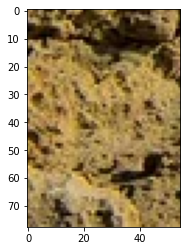

In [654]:
muestra_tierra = img3[450:-100,0:55,:]
plt.figure(1)
plt.imshow(muestra_tierra)
plt.show()

[140.1981351981352, 113.61002331002331, 65.0034965034965]
[52.07772026088954, 48.04604087805156, 36.80742092106848]
[18.845687645687647, 149.74498834498834, 140.1981351981352]
[3.160502350876192, 46.58172009895607, 52.07772026088954]


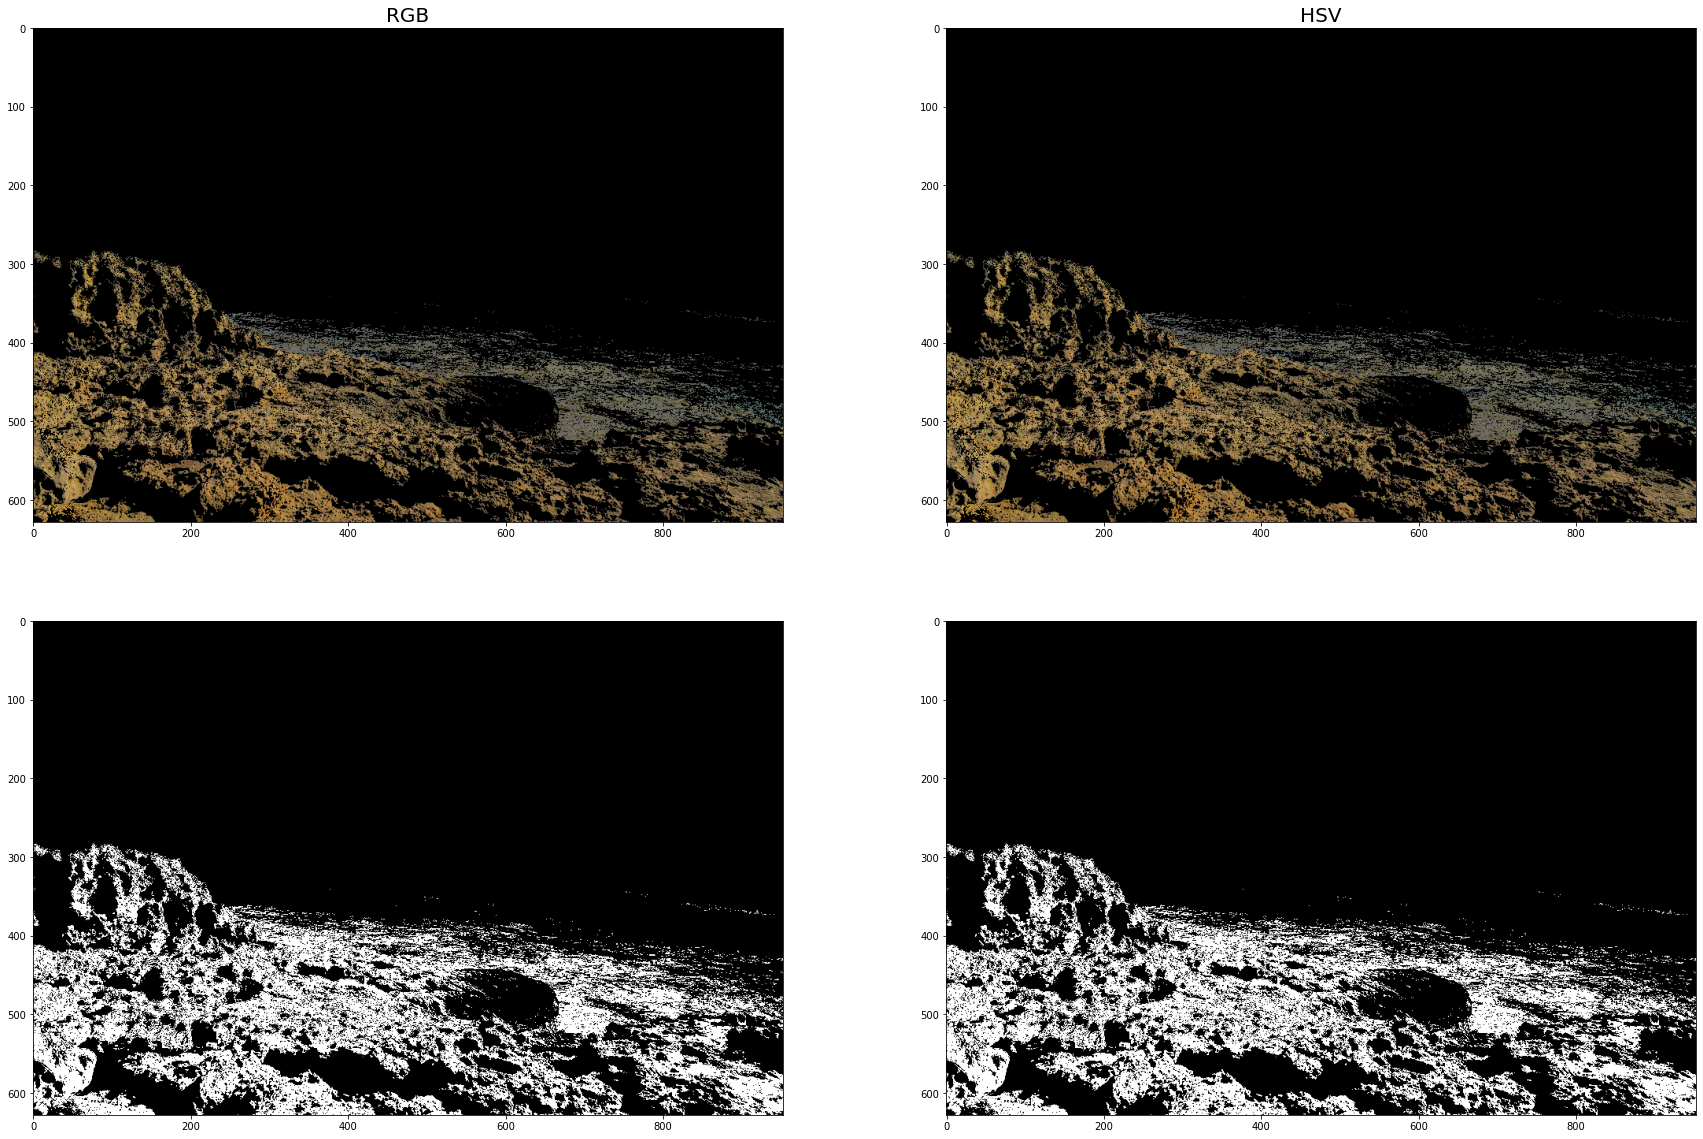

In [655]:
#Obtengo las medias y desviaciones estándar en RGB y HSV
color_mean, color_std = cv.meanStdDev(muestra_tierra)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

color_mean_HSV, color_std_HSV = cv.meanStdDev(cv.cvtColor(muestra_tierra, cv.COLOR_RGB2HSV))
print(color_mean_HSV.flatten().tolist())
print(color_std_HSV.flatten().tolist())

n_sigma = 1.25
mask = cv.inRange(img3, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv.bitwise_and(img3, img3, mask=mask)

mask_HSV = cv.inRange(img_HSV, color_mean_HSV-color_std_HSV * n_sigma,  color_mean_HSV+color_std_HSV * n_sigma)
img_segmentada_HSV = cv.bitwise_and(img3, img3, mask=mask)


fig = plt.figure(figsize=(30,20))

ax1 = plt.subplot(221)
ax1.imshow(img_segmentada)
ax1.set_title('RGB', fontdict= {'fontsize': 20})
ax3 =plt.subplot(223)
ax3.imshow(mask,cmap='gray')

ax1 = plt.subplot(222)
ax1.imshow(img_segmentada_HSV)
ax1.set_title('HSV', fontdict= {'fontsize': 20})
ax3 =plt.subplot(224)
ax3.imshow(mask,cmap='gray')